In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
from sklearn.datasets import make_regression

In [3]:
df=pd.read_csv('/content/sample_data/Bengaluru_House_Data.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.fillna(method='ffill', inplace=True)
encoder = LabelEncoder()
df['area_type'] = encoder.fit_transform(df['area_type'])
df['availability'] = encoder.fit_transform(df['availability'])
df['location'] = encoder.fit_transform(df['location'])
df['size'] = encoder.fit_transform(df['size'])
df['society'] = encoder.fit_transform(df['society'])

In [6]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df.dropna(subset=['total_sqft'], inplace=True)

In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,419,13,464,1056.0,2.0,1.0,39.07
1,2,80,317,19,2439,2600.0,5.0,3.0,120.00
2,0,80,1179,16,2439,1440.0,2.0,3.0,62.00
3,3,80,757,16,2186,1521.0,3.0,1.0,95.00
4,3,80,716,13,2186,1200.0,2.0,1.0,51.00


<Axes: >

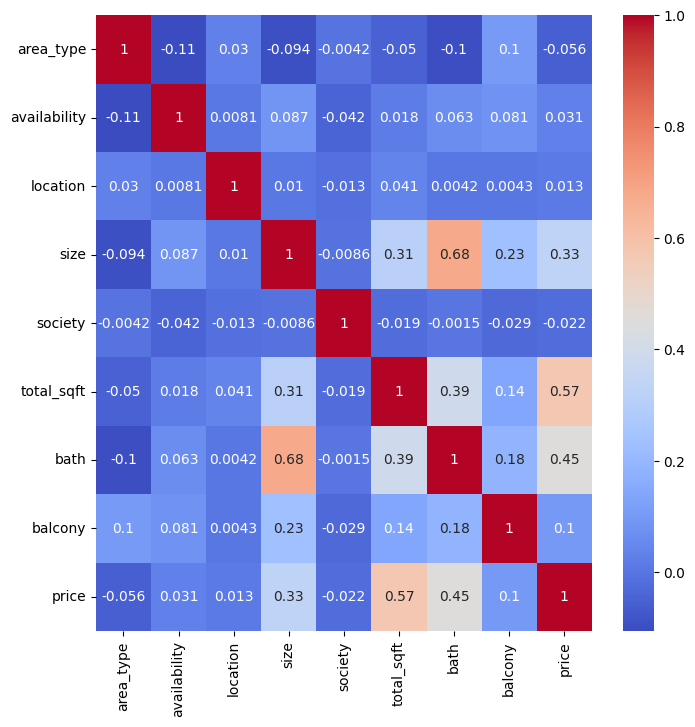

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

In [9]:
X = df.drop('price', axis=1)
y = df['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [12]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 20114.629364716675
R-squared: 0.2359991100636446


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear', 'poly', 'rbf'],
              'epsilon':[0.1,0.2,0.3]
              }

In [ ]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.474 total time=15.9min
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.042 total time=12.2min
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.447 total time=15.7min
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.414 total time=16.3min
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.183 total time=13.4min


In [ ]:
grid.best_params_

In [ ]:
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform, randint

param_dist = {  'kernel': ['linear', 'poly', 'rbf']}
n_iter_search = 20

random_search = RandomizedSearchCV(SVR(), param_distributions=param_dist, n_iter=n_iter_search, cv=5, verbose=3)

In [ ]:
rad=random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
print("Best parameters found:", rad.best_params_)
print("Best score found:", rad.best_score_)

In your scenario, the most appropriate metric to evaluate the performance of your SVM regression models for house price prediction, focusing on explaining variance, is the R-squared (R²) metric.

Here's why:

R-squared: This metric represents the proportion of variance in the dependent variable (house price) that can be explained by the independent variables (area, location, size, etc.) in your model. It ranges from 0 to 1, with a higher value indicating a better fit. In your case, you want to maximize the explained variance, so R² is ideal.
Other options:
Mean Squared Error (MSE): This measures the average squared difference between predicted and actual prices. Lower MSE is better, but it doesn't directly tell you how well the model explains variance.
Mean Absolute Error (MAE): Similar to MSE but uses absolute differences. It's less sensitive to outliers but again, doesn't directly measure explained variance.
Additional points:

It's a good practice to report both R² and another metric like MSE or MAE for a more comprehensive evaluation.
You can compare R² values across different models (linear, polynomial, RBF kernel) to see which one explains the variance in house price the best.